In [ ]:
import tarfile

# Path to your tar.gz file
file_path = 'C:/Users/saksh/Downloads/iscxids2012-master.tar.gz'

# Extract contents of the tar.gz file
with tarfile.open(file_path, 'r:gz') as tar:
    tar.extractall(path='C:/Users/saksh/Downloads/extracted')  # Extract into a folder
    print("Extraction completed!")


In [2]:
import pandas as pd

# Specify the file path
file_path = "C:/Users/saksh/OneDrive/Desktop/projects/secpen/TestbedSatJun12Flows.csv"  # Replace with your actual file path
target_column = "Label"  # Replace with your target/dependent column name

# Load the CSV file
data = pd.read_csv(file_path)

# Group by the target column to get unique classes
grouped_data = data.groupby(target_column)

# Sample from each class group proportionally
sampled_data = grouped_data.apply(lambda x: x.sample(frac=min(1, 10000 / len(data)))).reset_index(drop=True)

# Save the sampled data to a new CSV file
sampled_data.to_csv("C:/Users/saksh/OneDrive/Desktop/projects/secpen/sampled_data.csv", index=False)

print(f"Sampled dataset with 10,000 rows saved as 'sampled_data.csv'")


C:\Users\saksh\AppData\Local\Temp\ipykernel_2104\1660055523.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = grouped_data.apply(lambda x: x.sample(frac=min(1, 10000 / len(data)))).reset_index(drop=True)


Sampled dataset with 10,000 rows saved as 'sampled_data.csv'


### data downloaded and randomized

In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [87]:

# Load the dataset
file_path = 'C:/Users/saksh/OneDrive/Desktop/projects/secpen/sampled_data.csv'
data = pd.read_csv(file_path)


In [88]:
data.columns

Index(['generated', 'appName', 'totalSourceBytes', 'totalDestinationBytes',
       'totalDestinationPackets', 'totalSourcePackets',
       'sourcePayloadAsBase64', 'sourcePayloadAsUTF',
       'destinationPayloadAsBase64', 'destinationPayloadAsUTF', 'direction',
       'sourceTCPFlagsDescription', 'destinationTCPFlagsDescription', 'source',
       'protocolName', 'sourcePort', 'destination', 'destinationPort',
       'startDateTime', 'stopDateTime', 'Label'],
      dtype='object')

In [89]:
data.head()

,generated,appName,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,sourcePayloadAsBase64,sourcePayloadAsUTF,destinationPayloadAsBase64,destinationPayloadAsUTF,...,sourceTCPFlagsDescription,destinationTCPFlagsDescription,source,protocolName,sourcePort,destination,destinationPort,startDateTime,stopDateTime,Label
0,3/11/2014 17:23,SSH,1469,2859,16,12,NaN,NaN,NaN,NaN,...,"F,S,P,A","F,S,P,A",80.66.211.179,tcp_ip,50088,192.168.5.122,22,6/12/2010 18:48,6/12/2010 18:48,Attack
1,3/11/2014 17:23,SSH,1567,2945,17,13,NaN,NaN,NaN,NaN,...,"F,S,P,A","F,S,P,A",80.66.211.179,tcp_ip,50207,192.168.5.122,22,6/12/2010 16:47,6/12/2010 16:48,Attack
2,3/11/2014 17:23,SSH,1703,3791,18,15,NaN,NaN,NaN,NaN,...,"F,S,P,A","F,S,P,A",80.66.211.179,tcp_ip,55070,192.168.5.122,22,6/12/2010 17:55,6/12/2010 17:55,Attack
3,3/11/2014 17:23,SSH,1539,3069,19,13,NaN,NaN,NaN,NaN,...,"F,S,P,A","F,S,P,A",80.66.211.179,tcp_ip,52846,192.168.5.122,22,6/12/2010 18:44,6/12/2010 18:44,Attack
4,3/11/2014 17:23,SSH,1539,2789,15,13,NaN,NaN,NaN,NaN,...,"F,S,P,A","F,S,P,A",80.66.211.179,tcp_ip,42206,192.168.5.122,22,6/12/2010 18:26,6/12/2010 18:26,Attack


In [90]:

# Step 1: Data Preprocessing
# Drop irrelevant columns
irrelevant_columns = [
    'generated', 'appName', 'sourcePayloadAsBase64', 'sourcePayloadAsUTF',
    'destinationPayloadAsBase64', 'destinationPayloadAsUTF', 'startDateTime',
    'stopDateTime', 'source', 'destination', 'sourceTCPFlagsDescription',
    'destinationTCPFlagsDescription'
]
data = data.drop(columns=irrelevant_columns)
data.columns


Index(['totalSourceBytes', 'totalDestinationBytes', 'totalDestinationPackets',
       'totalSourcePackets', 'direction', 'protocolName', 'sourcePort',
       'destinationPort', 'Label'],
      dtype='object')

In [91]:

# Handle missing values
data = data.fillna(0)


In [92]:
data

,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,direction,protocolName,sourcePort,destinationPort,Label
0,1469,2859,16,12,R2L,tcp_ip,50088,22,Attack
1,1567,2945,17,13,R2L,tcp_ip,50207,22,Attack
2,1703,3791,18,15,R2L,tcp_ip,55070,22,Attack
3,1539,3069,19,13,R2L,tcp_ip,52846,22,Attack
4,1539,2789,15,13,R2L,tcp_ip,42206,22,Attack
...,...,...,...,...,...,...,...,...,...
9995,446,671,5,5,L2R,tcp_ip,3254,80,Normal
9996,384,0,0,6,L2R,tcp_ip,2889,443,Normal
9997,3120,26893,25,21,L2R,tcp_ip,1134,443,Normal
9998,586,4835,7,7,L2R,tcp_ip,4292,80,Normal


In [93]:

# Encode categorical variables
label_encoder = LabelEncoder()
data['direction'] = label_encoder.fit_transform(data['direction'])
data['protocolName'] = label_encoder.fit_transform(data['protocolName'])
data['Label'] = label_encoder.fit_transform(data['Label'])  # Attack: 1, Benign: 0


In [94]:
data

,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,direction,protocolName,sourcePort,destinationPort,Label
0,1469,2859,16,12,2,2,50088,22,0
1,1567,2945,17,13,2,2,50207,22,0
2,1703,3791,18,15,2,2,55070,22,0
3,1539,3069,19,13,2,2,52846,22,0
4,1539,2789,15,13,2,2,42206,22,0
...,...,...,...,...,...,...,...,...,...
9995,446,671,5,5,1,2,3254,80,1
9996,384,0,0,6,1,2,2889,443,1
9997,3120,26893,25,21,1,2,1134,443,1
9998,586,4835,7,7,1,2,4292,80,1


In [95]:
# Separate features and target variable
X = data.drop(columns=['Label'])
y = data['Label']


In [96]:
#a=x_train, b=x_test, c=y_train, d=y_test
a,b,c,d = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [97]:
X

,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,direction,protocolName,sourcePort,destinationPort
0,1469,2859,16,12,2,2,50088,22
1,1567,2945,17,13,2,2,50207,22
2,1703,3791,18,15,2,2,55070,22
3,1539,3069,19,13,2,2,52846,22
4,1539,2789,15,13,2,2,42206,22
...,...,...,...,...,...,...,...,...
9995,446,671,5,5,1,2,3254,80
9996,384,0,0,6,1,2,2889,443
9997,3120,26893,25,21,1,2,1134,443
9998,586,4835,7,7,1,2,4292,80


In [98]:
# Normalize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [99]:
X

array([[-0.01394947, -0.02866856, -0.01866713, ..., -0.62537329,
         2.14947936, -0.12355101],
       [-0.01251896, -0.02860052, -0.01753309, ..., -0.62537329,
         2.15632169, -0.12355101],
       [-0.01053376, -0.02793118, -0.01639906, ..., -0.62537329,
         2.43593728, -0.12355101],
       ...,
       [ 0.01015025, -0.00965336, -0.00846081, ..., -0.62537329,
        -0.66530611, -0.03795831],
       [-0.02683867, -0.02710519, -0.02887345, ..., -0.62537329,
        -0.48372559, -0.11175914],
       [-0.024182  , -0.03093054, -0.03681169, ..., -0.62537329,
        -0.57359587, -0.11175914]])

In [100]:

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [101]:
# Step 3: Model Training
from xgboost import XGBClassifier

#XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)


c:\Users\saksh\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:53:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [102]:

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [103]:

# Support Vector Machine
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)


SVC(kernel='linear', probability=True, random_state=42)

In [104]:

# Step 4: Model Evaluation
# Random Forest Evaluation
rf_predictions = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

# SVM Evaluation
svm_predictions = svm_model.predict(X_test)
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_predictions))

#XGBoost Evaluation
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       1.00      1.00      1.00      1969

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        31
           1       1.00      1.00      1.00      1969

    accuracy                           1.00      2000
   macro avg       0.92      1.00      0.96      2000
weighted avg       1.00      1.00      1.00      2000

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       1.00      1.00      1.00      1969

    accuracy                           1.00      2000
   macro avg       0.98      0.9

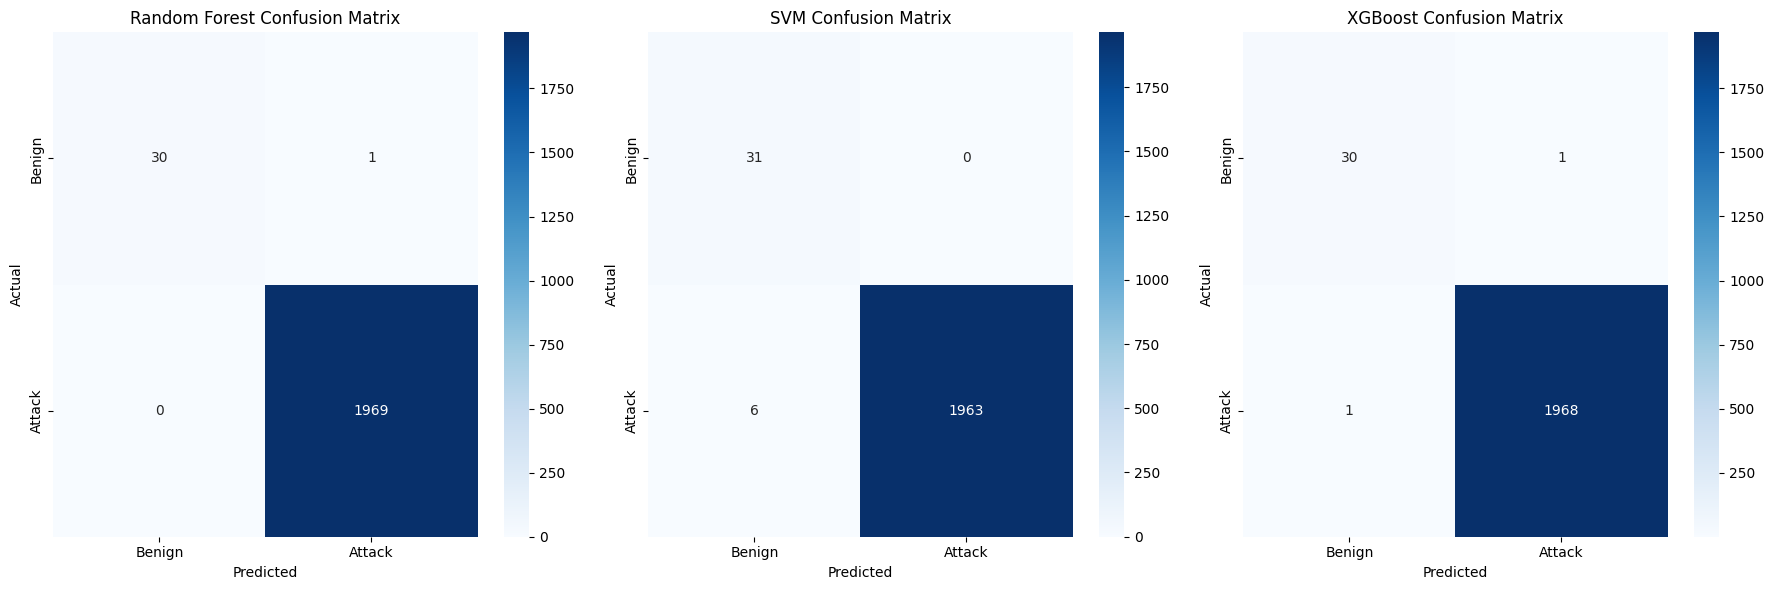

In [105]:
# Generate predictions using trained models
y_pred_rf = rf_model.predict(X_test)  # Predictions from Random Forest
y_pred_svm = svm_model.predict(X_test)  # Predictions from SVM
y_pred_xgb = xgb_model.predict(X_test)  # Predictions from XGBoost

# Function to plot confusion matrices
def plot_confusion_matrices(y_true, y_preds, titles, figsize=(18, 6)):
    """
    Plots confusion matrices for multiple models.

    Args:
        y_true: Ground truth labels.
        y_preds: List of predictions from different models.
        titles: List of titles corresponding to each model.
        figsize: Size of the overall figure.
    """
    plt.figure(figsize=figsize)
    for i, (y_pred, title) in enumerate(zip(y_preds, titles), start=1):
        cm = confusion_matrix(y_true, y_pred)
        plt.subplot(1, len(y_preds), i)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Attack'], yticklabels=['Benign', 'Attack'])
        plt.title(title)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# List of predictions and titles
predictions = [y_pred_rf, y_pred_svm, y_pred_xgb]
titles = ["Random Forest Confusion Matrix", "SVM Confusion Matrix", "XGBoost Confusion Matrix"]

# Plot all confusion matrices
plot_confusion_matrices(y_test, predictions, titles)


In [106]:

# # Feature Importance for Random Forest
# feature_importance = rf_model.feature_importances_
# features = pd.DataFrame({'Feature': data.drop(columns=['Label']).columns, 'Importance': feature_importance})
# features = features.sort_values(by='Importance', ascending=False)

# # Plot Feature Importance
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Importance', y='Feature', data=features)
# plt.title('Feature Importance (Random Forest)')
# plt.show()


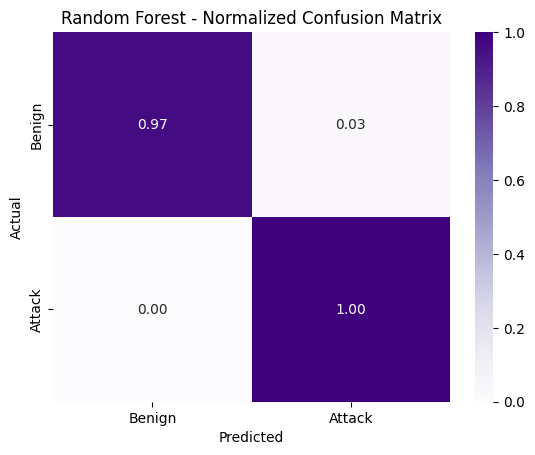

In [107]:
def plot_normalized_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Purples', xticklabels=['Benign', 'Attack'], yticklabels=['Benign', 'Attack'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_normalized_confusion_matrix(y_test, y_pred_rf, "Random Forest - Normalized Confusion Matrix")


C:\Users\saksh\AppData\Local\Temp\ipykernel_2104\208981555.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


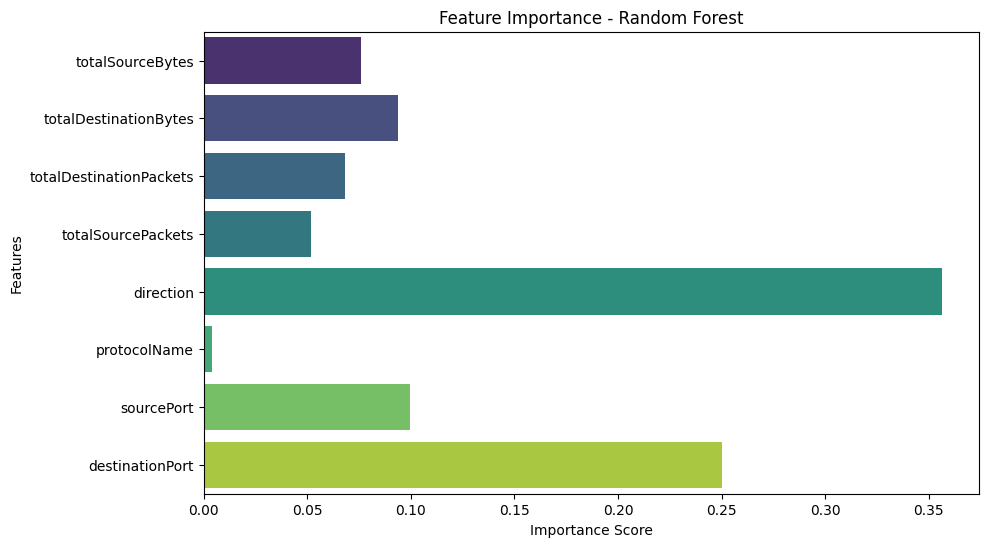

In [108]:
importances = rf_model.feature_importances_
feature_names = data.drop('Label', axis=1).columns 

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


<Figure size 1000x800 with 0 Axes>

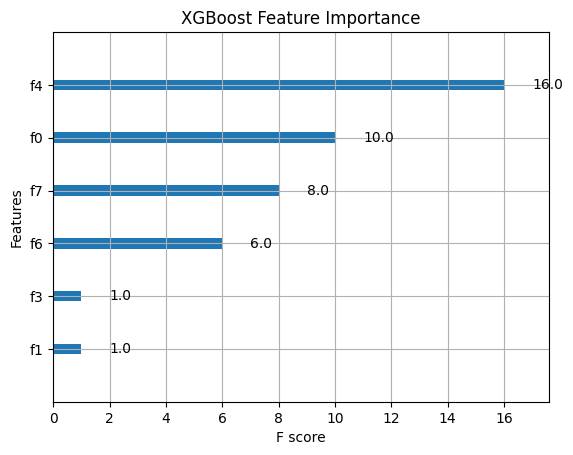

In [109]:
from xgboost import plot_importance

plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='weight', max_num_features=10, title="XGBoost Feature Importance")
plt.show()


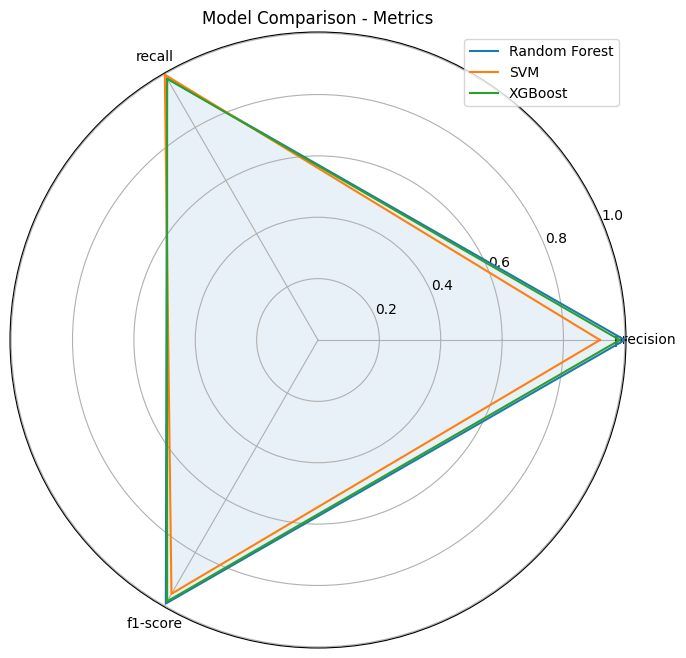

In [110]:
from math import pi

metrics = {
    "Random Forest": classification_report(y_test, y_pred_rf, output_dict=True)["macro avg"],
    "SVM": classification_report(y_test, y_pred_svm, output_dict=True)["macro avg"],
    "XGBoost": classification_report(y_test, y_pred_xgb, output_dict=True)["macro avg"],
}

metrics_df = pd.DataFrame(metrics).T[['precision', 'recall', 'f1-score']]
metrics_df.index = ["Random Forest", "SVM", "XGBoost"]

categories = metrics_df.columns.tolist()
values = metrics_df.to_numpy()

plt.figure(figsize=(8, 8))
for i, model in enumerate(metrics_df.index):
    values_radar = values[i].tolist() + [values[i, 0]]  # Close the radar chart
    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]
    plt.polar(angles, values_radar, label=model)

plt.xticks(angles[:-1], categories)
plt.fill(angles, values_radar, alpha=0.1)
plt.legend(loc="upper right")
plt.title("Model Comparison - Metrics")
plt.show()


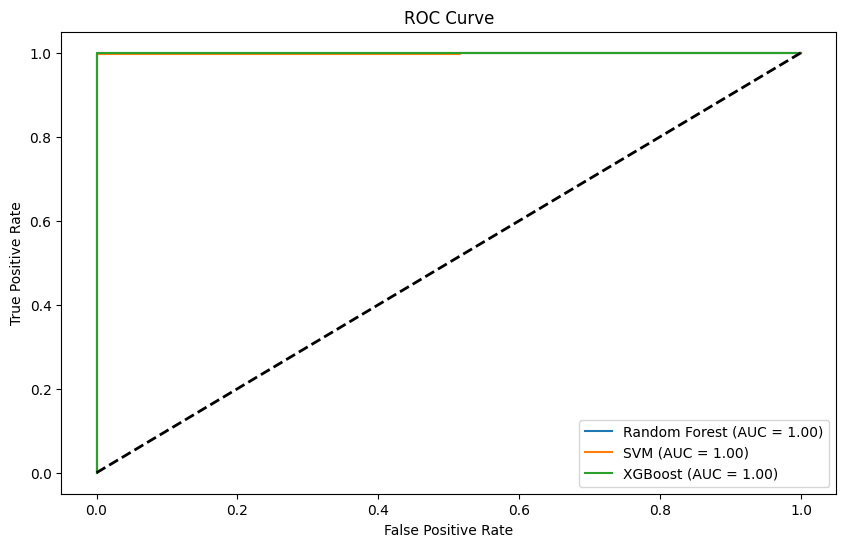

In [111]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(10, 6))

for model_name, y_pred_proba in zip(
    ["Random Forest", "SVM", "XGBoost"],
    [rf_model.predict_proba(X_test)[:, 1], 
     svm_model.decision_function(X_test), 
     xgb_model.predict_proba(X_test)[:, 1]]
):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


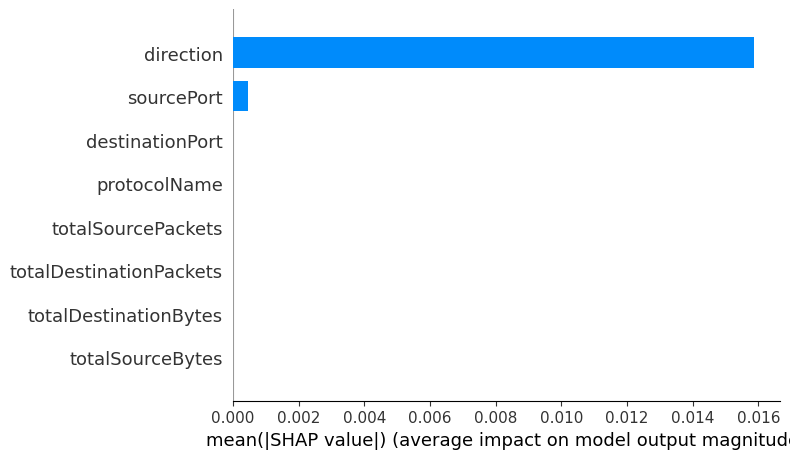

c:\Users\saksh\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\plots\_force_matplotlib.py:325: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(min_x, max_x)


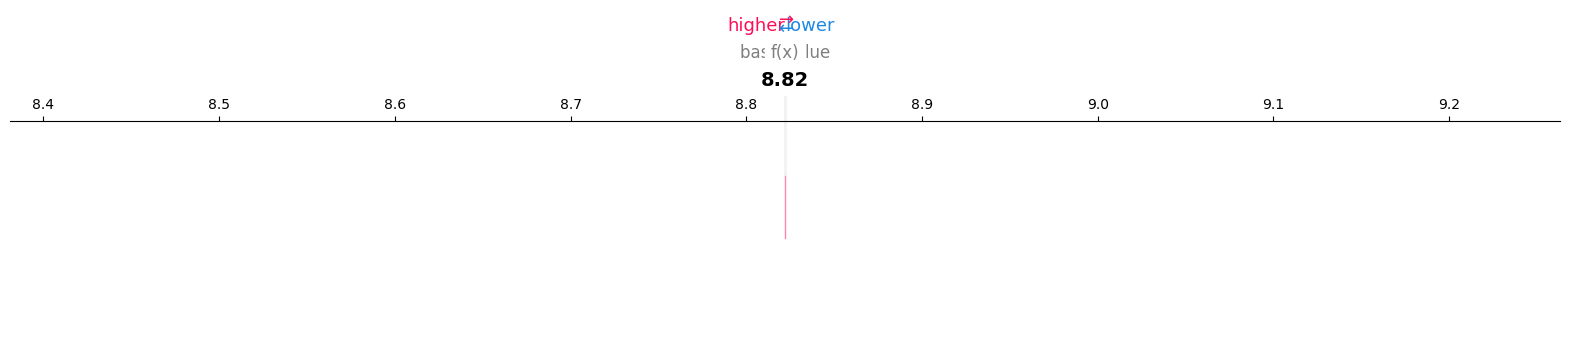

In [115]:
import shap

# Initialize SHAP's JS visualization
shap.initjs()

# Explain model predictions using SHAP
explainer = shap.Explainer(xgb_model, a)  # Replace `a` with your model training data
shap_values = explainer(b)  # Replace `b` with the data you are explaining

# Summary Plot
shap.summary_plot(shap_values, b, plot_type="bar")

# Force Plot for a Single Prediction
# Convert to required format
# Force Plot using Matplotlib
shap.force_plot(
    base_value=shap_values[0].base_values,
    shap_values=shap_values[0].values,
    features=b.iloc[0],
    matplotlib=True  # Use Matplotlib for inline rendering
)



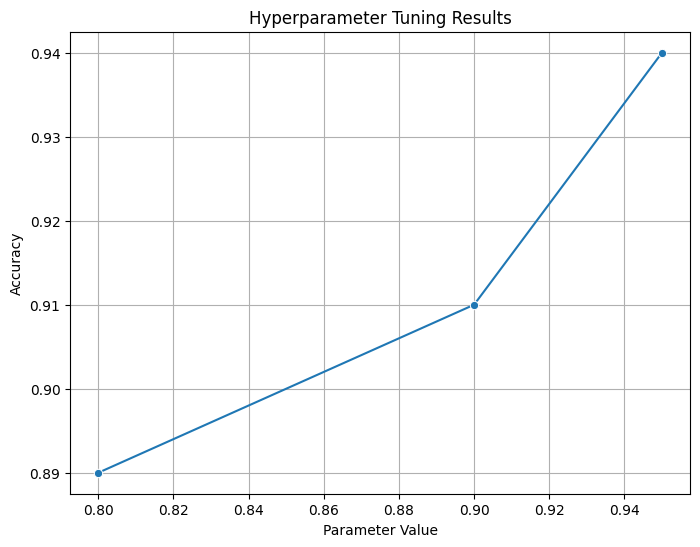

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example: Visualizing Grid Search or Random Search Results
# Create a DataFrame with tuning results
tuning_results = {
    "Parameter": ["param1", "param2", "param3"],
    "Value": [0.8, 0.9, 0.95],
    "Accuracy": [0.89, 0.91, 0.94],
}

df = pd.DataFrame(tuning_results)

# Plot tuning results
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="Value", y="Accuracy", marker="o")
plt.title("Hyperparameter Tuning Results")
plt.xlabel("Parameter Value")
plt.ylabel("Accuracy")
plt.grid()
plt.show()


In [119]:
from sklearn.ensemble import IsolationForest

# Train Isolation Forest for Anomaly Detection
iso = IsolationForest(contamination=0.01, random_state=42)
y_anomaly = iso.fit_predict(X_test)  # Detect anomalies in the test set

# Visualize Anomaly Labels
print("Anomaly Labels for the First 10 Instances:", y_anomaly[:10])

# Count anomalies and normal instances
unique, counts = np.unique(y_anomaly, return_counts=True)
print("Counts of Anomalies and Normal Instances:", dict(zip(unique, counts)))


Anomaly Labels for the First 10 Instances: [1 1 1 1 1 1 1 1 1 1]
Counts of Anomalies and Normal Instances: {np.int64(-1): np.int64(20), np.int64(1): np.int64(1980)}


In [123]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    cohen_kappa_score,
    matthews_corrcoef
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [127]:
def evaluate_model(y_test, y_pred, model_name, y_prob=None):
    print(f"--- {model_name} Evaluation ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='binary'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='binary'):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='binary'):.4f}")
    print(f"Cohen Kappa Score: {cohen_kappa_score(y_test, y_pred):.4f}")
    print(f"Matthews Correlation Coefficient: {matthews_corrcoef(y_test, y_pred):.4f}")

    # Check if probabilities are provided for AUC-ROC
    if y_prob is not None:
        if y_prob.ndim == 1:  # Handle decision_function output (1D array)
            roc_auc = roc_auc_score(y_test, y_prob)
        else:  # Handle predict_proba output (2D array)
            roc_auc = roc_auc_score(y_test, y_prob[:, 1])
        print(f"AUC-ROC: {roc_auc:.4f}")
    else:
        roc_auc = None

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=["Benign", "Attack"]))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=["Benign", "Attack"], yticklabels=["Benign", "Attack"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    if y_prob is not None:
        RocCurveDisplay.from_predictions(y_test, y_prob if y_prob.ndim == 1 else y_prob[:, 1])  # Handle both cases
        plt.title(f"ROC Curve for {model_name}")
        plt.show()

    # Precision-Recall Curve
    if y_prob is not None:
        PrecisionRecallDisplay.from_predictions(y_test, y_prob if y_prob.ndim == 1 else y_prob[:, 1])  # Handle both cases
        plt.title(f"Precision-Recall Curve for {model_name}")
        plt.show()

    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='binary'),
        "Recall": recall_score(y_test, y_pred, average='binary'),
        "F1-Score": f1_score(y_test, y_pred, average='binary'),
        "AUC-ROC": roc_auc,
        "Cohen Kappa": cohen_kappa_score(y_test, y_pred),
        "MCC": matthews_corrcoef(y_test, y_pred),
    }


--- XGBoost Evaluation ---
Accuracy: 0.9990
Precision: 0.9995
Recall: 0.9995
F1-Score: 0.9995
Cohen Kappa Score: 0.9672
Matthews Correlation Coefficient: 0.9672
AUC-ROC: 1.0000

Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.97      0.97        31
      Attack       1.00      1.00      1.00      1969

    accuracy                           1.00      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       1.00      1.00      1.00      2000



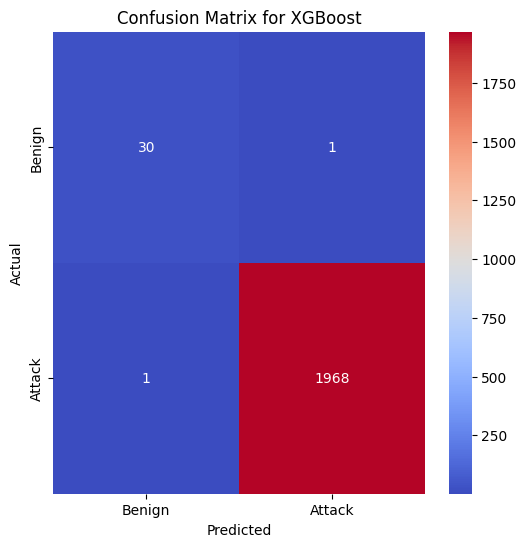

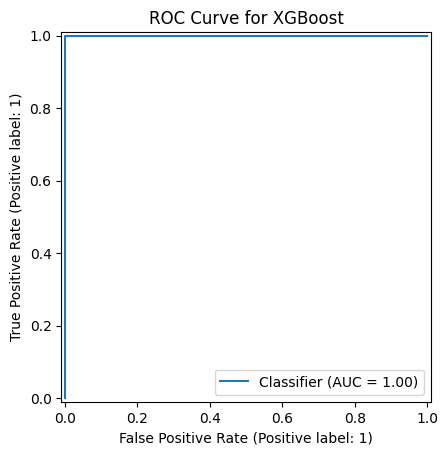

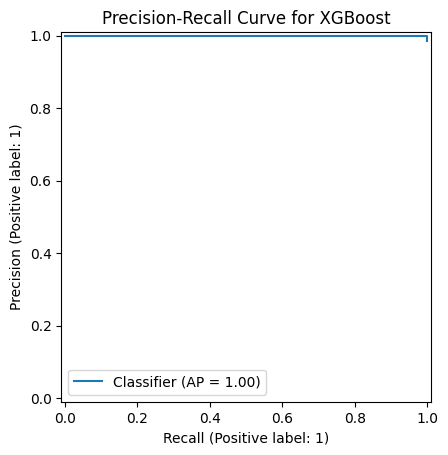

--- Random Forest Evaluation ---
Accuracy: 0.9995
Precision: 0.9995
Recall: 1.0000
F1-Score: 0.9997
Cohen Kappa Score: 0.9834
Matthews Correlation Coefficient: 0.9835
AUC-ROC: 1.0000

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.97      0.98        31
      Attack       1.00      1.00      1.00      1969

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



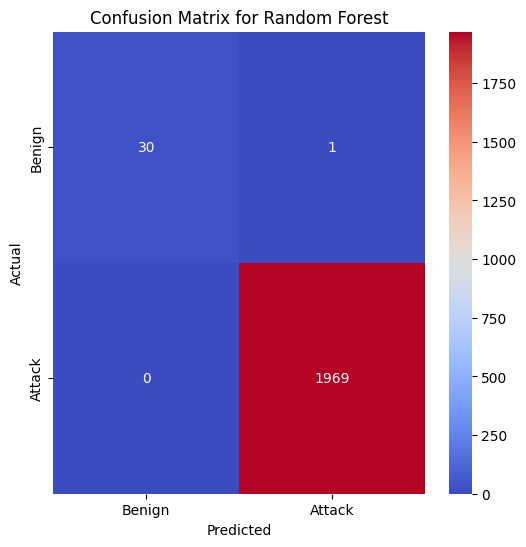

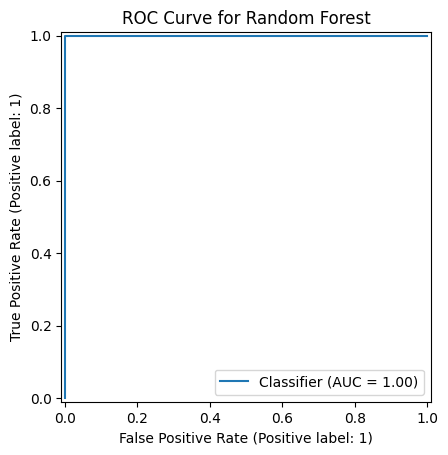

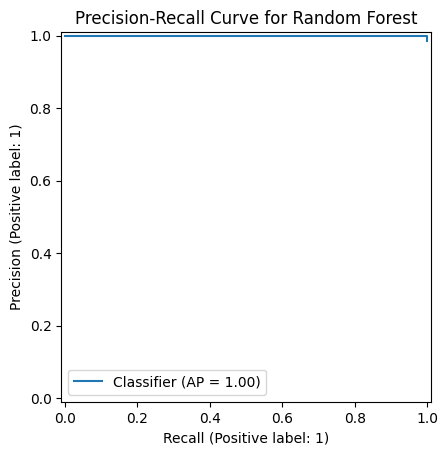

--- SVM Evaluation ---
Accuracy: 0.9970
Precision: 1.0000
Recall: 0.9970
F1-Score: 0.9985
Cohen Kappa Score: 0.9103
Matthews Correlation Coefficient: 0.9139
AUC-ROC: 0.9982

Classification Report:
              precision    recall  f1-score   support

      Benign       0.84      1.00      0.91        31
      Attack       1.00      1.00      1.00      1969

    accuracy                           1.00      2000
   macro avg       0.92      1.00      0.96      2000
weighted avg       1.00      1.00      1.00      2000



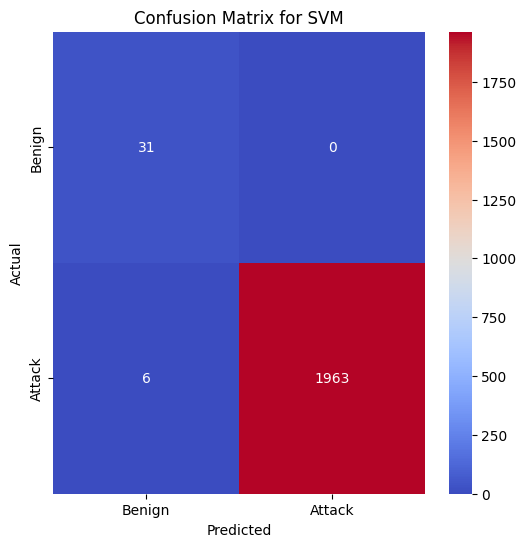

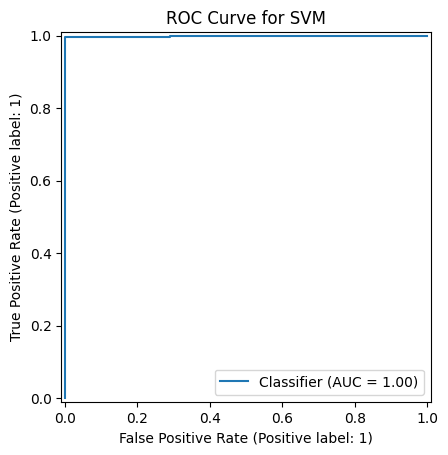

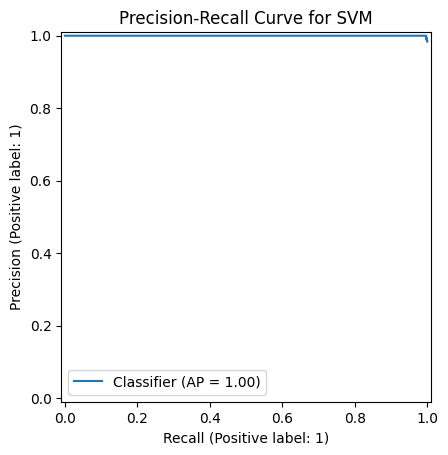


--- Model Evaluation Summary ---
           Model  Accuracy  Precision    Recall  F1-Score   AUC-ROC  \
0        XGBoost    0.9990   0.999492  0.999492  0.999492  0.999984   
1  Random Forest    0.9995   0.999492  1.000000  0.999746  1.000000   
2            SVM    0.9970   1.000000  0.996953  0.998474  0.998198   

   Cohen Kappa       MCC  
0     0.967234  0.967234  
1     0.983353  0.983489  
2     0.910251  0.913939  


In [128]:
# Evaluate XGBoost
xgb_results = evaluate_model(y_test, y_pred_xgb, "XGBoost", y_prob=xgb_model.predict_proba(X_test))

# Evaluate Random Forest
rf_results = evaluate_model(y_test, y_pred_rf, "Random Forest", y_prob=rf_model.predict_proba(X_test))

# Evaluate SVM (adjusted for decision_function output)
svm_results = evaluate_model(y_test, y_pred_svm, "SVM", y_prob=svm_model.decision_function(X_test))

# Combine results into a DataFrame for comparison
evaluation_df = pd.DataFrame([xgb_results, rf_results, svm_results])
print("\n--- Model Evaluation Summary ---")
print(evaluation_df)


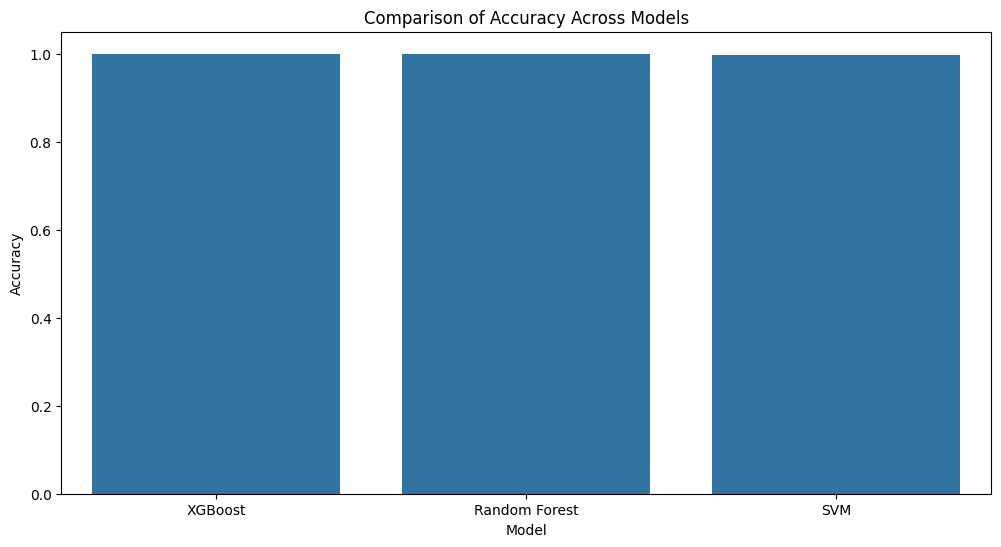

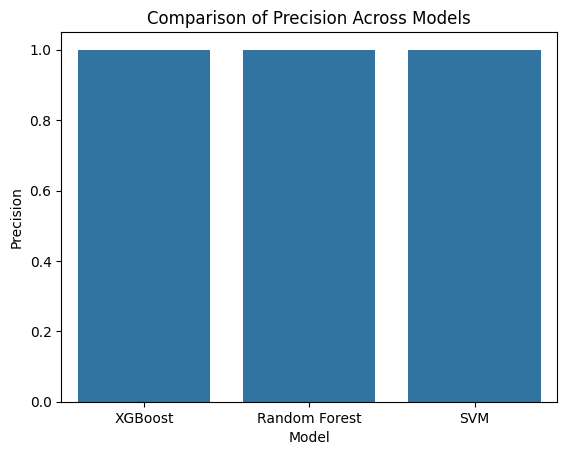

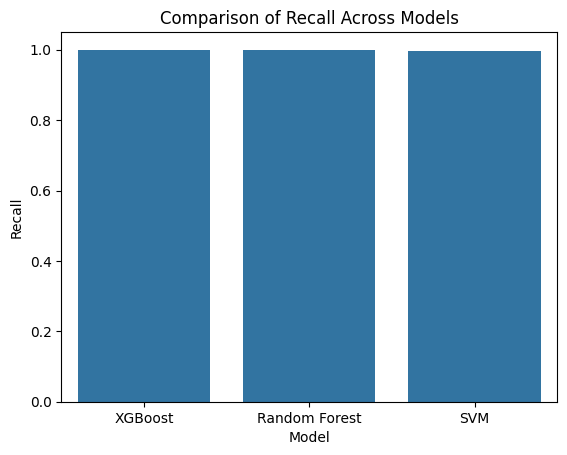

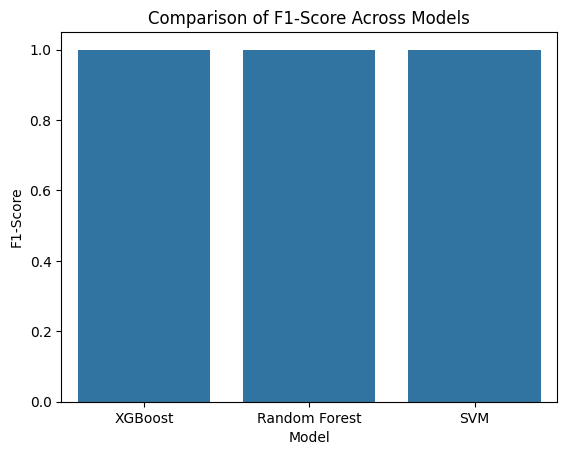

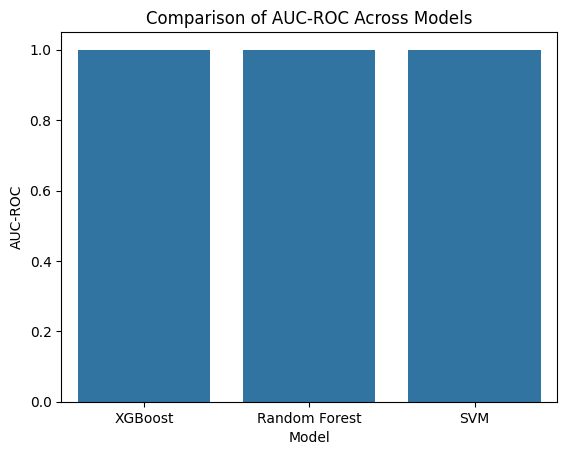

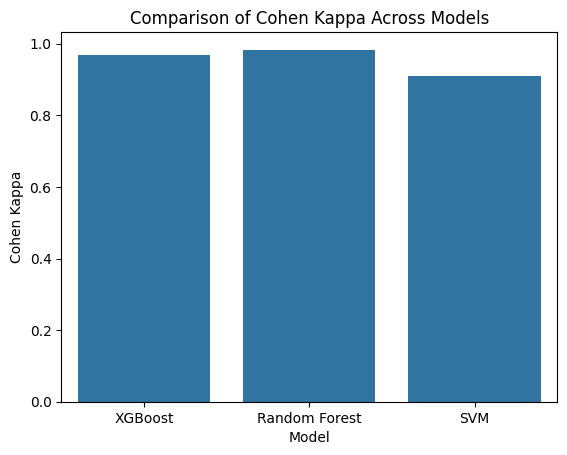

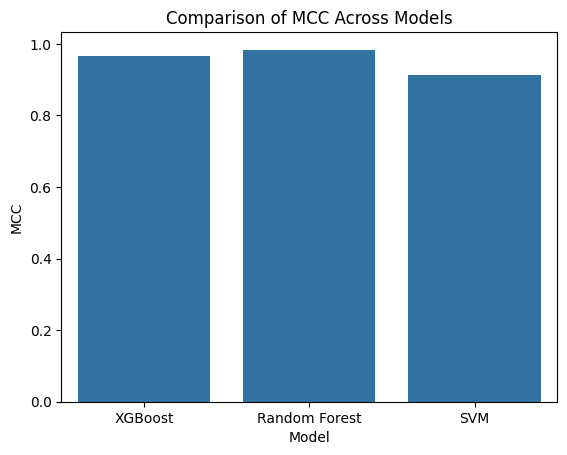

In [129]:

# Plot Comparison of Metrics
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC", "Cohen Kappa", "MCC"]

plt.figure(figsize=(12, 6))
for metric in metrics_to_plot:
    sns.barplot(data=evaluation_df, x="Model", y=metric)
    plt.title(f"Comparison of {metric} Across Models")
    plt.show()
